<a href="https://colab.research.google.com/github/anaelisabraz/LC/blob/main/Prova_Ana_Elisa_Braz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UFC Predictor

Para a avaliação do módulo

In [34]:
# Imports and Helper Functions
# data Analysis
import pandas as pd
import numpy as np
import random as rng

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#SciKit Learn Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import accuracy_score, classification_report,confusion_matrix


In [8]:
data = pd.read_csv("/content/data.csv")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Columns: 895 entries, BPrev to winner
dtypes: float64(873), int64(13), object(9)
memory usage: 10.1+ MB


A base contém 879 colunas sendo uma delas a variável dependente (Winner) e as demais variáveis independentes. 

A maior parte das variáveis são do tipo float, mas tabém existem variáveis do tipo inteiro e variáveis categóricas.

In [12]:
data.describe()

,BPrev,BStreak,B_Age,B_Height,B_ID,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,...,R__Round5_TIP_Distance Time,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time
count,1477.000000,1477.000000,1474.000000,1476.000000,1477.000000,1477.000000,978.000000,978.000000,978.000000,978.000000,...,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,1.735274,0.654705,30.954545,177.451220,1964.633040,73.804333,0.036810,0.896728,0.431493,2.986708,...,211.965278,34.062500,66.604167,5.527778,4.319444,5.138889,12.097222,224.965278,4.562500,263.069444
std,1.895561,1.057269,4.020311,8.561541,666.949141,14.980531,0.193748,1.255722,0.830527,3.987291,...,139.412374,68.819742,94.574736,22.374419,12.854023,14.312013,36.429320,142.328509,19.698681,162.386212
min,0.000000,0.000000,20.000000,152.000000,129.000000,52.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,28.000000,172.000000,1755.000000,65.000000,0.000000,0.000000,0.000000,0.000000,...,110.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,126.750000,0.000000,139.000000
50%,1.000000,0.000000,31.000000,177.000000,2156.000000,70.000000,0.000000,0.000000,0.000000,2.000000,...,214.000000,0.000000,9.500000,0.000000,0.000000,0.000000,0.000000,232.000000,0.000000,291.000000
75%,3.000000,1.000000,34.000000,182.000000,2337.000000,84.000000,0.000000,1.000000,1.000000,4.000000,...,294.500000,47.500000,109.000000,0.000000,0.000000,0.000000,2.000000,299.000000,0.000000,300.000000
max,11.000000,7.000000,46.000000,213.000000,2882.000000,120.000000,2.000000,9.000000,6.000000,33.000000,...,647.000000,496.000000,529.000000,144.000000,91.000000,62.000000,264.000000,659.000000,128.000000,841.000000


In [11]:
data.describe(include=['O'])

,B_HomeTown,B_Location,B_Name,Date,R_HomeTown,R_Location,R_Name,winby,winner
count,1471,1470,1477,1477,1477,1476,1477,1461,1477
unique,568,431,719,224,495,390,633,3,4
top,Rio de Janeiro Brazil,Rio de Janeiro Brazil,Tim Means,07/11/2016,Rio de Janeiro Brazil,Rio de Janeiro Brazil,Donald Cerrone,DEC,red
freq,32,38,8,32,44,67,11,720,867


As letras B e R que iniciam o nome das variáveis se referem aos "lados" da luta, isto é, quando há B iniciando o nome da vraiável, os dados referem-se ao lado de cor azul; quando a vraiável iniciam com R, os dados referem-se ao lado vermelho. 

Com base nisso, podem se observados alguns fatos acerda dos dados: 

1) O lado vermelho hospeda mais lutas que o azul (44 x 32).

2) O Rio de Janeiro hospedou mais lutas que qualquer outro estado e cidade nessa base de dados. 

3) O lutador que mais ganhou lutas no lado azul foi o Tim Means (8 lutas) e no lado vermelho foi o Donald Cerrone (11 lutas). 

4) O lado vermelho ganha com maior frequência, contabilizando 867 lutas. 

5) A maior parte das lutas é vencida por decisão, contabilizando 720 lutas. 


In [13]:
data.head()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,1,1,23.0,182.0,Trento Italy,2783,Mezzocorona Italy,Marvin Vettori,84,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
1,0,0,32.0,175.0,"Careiro da Várzea, Amazonas Brazil",2208,"Pharr, Texas USA",Carlos Diego Ferreira,70,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB,blue
2,2,0,38.0,172.0,Kanagawa Japan,721,Tokyo Japan,Takanori Gomi,70,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red
3,0,0,23.0,170.0,Tijuana Mexico,2825,Tijuana Mexico,Brandon Moreno,56,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB,blue
4,3,1,30.0,167.0,"Spokane, WA USA",2260,"Spokane, WA USA",Elizabeth Phillips,61,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red


In [14]:
data.tail()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
1472,0,0,26.0,172.0,"Tlaltenango, Zacatecas Mexico",2355,"San Diego, California USA",Jose Quinonez,61,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
1473,2,1,26.0,165.0,"Tampa, Florida USA",2610,"Tampa, Florida USA",Geane Herrera,56,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DEC,red
1474,3,2,36.0,187.0,"Doylestown, Pennsylvania USA",1694,"Dana Point, California USA",Patrick Cummins,93,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,blue
1475,3,1,31.0,167.0,Irvine Scotland,2339,Glasgow Scotland,Joanne Calderwood,52,0.0,...,0.0,0.0,0.0,0.0,0.0,301.0,0.0,301.0,KO/TKO,blue
1476,2,1,31.0,187.0,The Netherlands,786,"Leiden, Holland The Netherlands",Gegard Mousasi,84,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB,red


Substituindo os NA por 0

In [15]:
data.fillna(value=0,inplace=True)

In [16]:
data.tail()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
1472,0,0,26.0,172.0,"Tlaltenango, Zacatecas Mexico",2355,"San Diego, California USA",Jose Quinonez,61,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DEC,red
1473,2,1,26.0,165.0,"Tampa, Florida USA",2610,"Tampa, Florida USA",Geane Herrera,56,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DEC,red
1474,3,2,36.0,187.0,"Doylestown, Pennsylvania USA",1694,"Dana Point, California USA",Patrick Cummins,93,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DEC,blue
1475,3,1,31.0,167.0,Irvine Scotland,2339,Glasgow Scotland,Joanne Calderwood,52,0.0,...,0.0,0.0,0.0,0.0,0.0,301.0,0.0,301.0,KO/TKO,blue
1476,2,1,31.0,187.0,The Netherlands,786,"Leiden, Holland The Netherlands",Gegard Mousasi,84,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SUB,red


In [17]:
dropdata = data.drop(['B_ID','B_Name','R_ID','R_Name','winby','Date'],axis=1)
dropdata.rename(columns={'BPrev':'B__Prev',
                         'RPrev':'R__Prev',
                         'B_Age':'B__Age',
                         'B_Height':'B__Height',
                         'B_Weight':'B__Weight',
                         'R_Age':'R__Age',
                         'R_Height':'R__Height',
                         'R_Weight':'R__Weight',
                         'BStreak':'B__Streak',
                         'RStreak': 'R__Streak'},inplace=True)
dropdata.describe()

,B__Prev,B__Streak,B__Age,B__Height,B__Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,B__Round1_Grappling_Takedowns_Landed,...,R__Round5_TIP_Distance Time,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time
count,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,...,1477.000000,1477.000000,1477.000000,1477.00000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000
mean,1.735274,0.654705,30.891672,177.331077,73.804333,0.024374,0.593771,0.285714,1.977657,0.801625,...,20.665538,3.320921,6.493568,0.53893,0.421124,0.501016,1.179418,21.932972,0.444821,25.647935
std,1.895561,1.057269,4.251308,9.724703,14.980531,0.158590,1.106235,0.705874,3.538432,1.538326,...,76.413344,23.685752,35.456443,7.15484,4.201244,4.708527,11.893653,80.116955,6.279119,92.995938
min,0.000000,0.000000,0.000000,0.000000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,28.000000,172.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,31.000000,177.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,34.000000,182.000000,84.000000,0.000000,1.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11.000000,7.000000,46.000000,213.000000,120.000000,2.000000,9.000000,6.000000,33.000000,17.000000,...,647.000000,496.000000,529.000000,144.00000,91.000000,62.000000,264.000000,659.000000,128.000000,841.000000


In [18]:
dropdata.describe(include=['O'])

,B_HomeTown,B_Location,R_HomeTown,R_Location,winner
count,1477,1477,1477,1477,1477
unique,569,432,495,391,4
top,Rio de Janeiro Brazil,Rio de Janeiro Brazil,Rio de Janeiro Brazil,Rio de Janeiro Brazil,red
freq,32,38,44,67,867


In [19]:
objecttypes = list(dropdata.select_dtypes(include=['O']).columns)
for col in objecttypes:
    dropdata[col] = dropdata[col].astype('category')

In [20]:
cat_columns = dropdata.select_dtypes(['category']).columns
dropdata[cat_columns] = dropdata[cat_columns].apply(lambda x: x.cat.codes)
dropdata.info()
dropdata.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Columns: 889 entries, B__Prev to winner
dtypes: float64(873), int16(4), int64(11), int8(1)
memory usage: 10.0 MB


,B__Prev,B__Streak,B__Age,B__Height,B_HomeTown,B_Location,B__Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,...,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winner
1472,0,0,26.0,172.0,505,331,61,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1473,2,1,26.0,165.0,491,378,56,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1474,3,2,36.0,187.0,125,110,93,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1475,3,1,31.0,167.0,210,154,52,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,301.0,0.0,301.0,0
1476,2,1,31.0,187.0,501,209,84,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


Devido à magnitude da base de dados, uma matriz de correlação se torna inviável, pois seria ilegível. 

Portanto, examinamos as n maiores correlações com nossa variável dependente (Winner) para procurar relacionamentos lineares. 



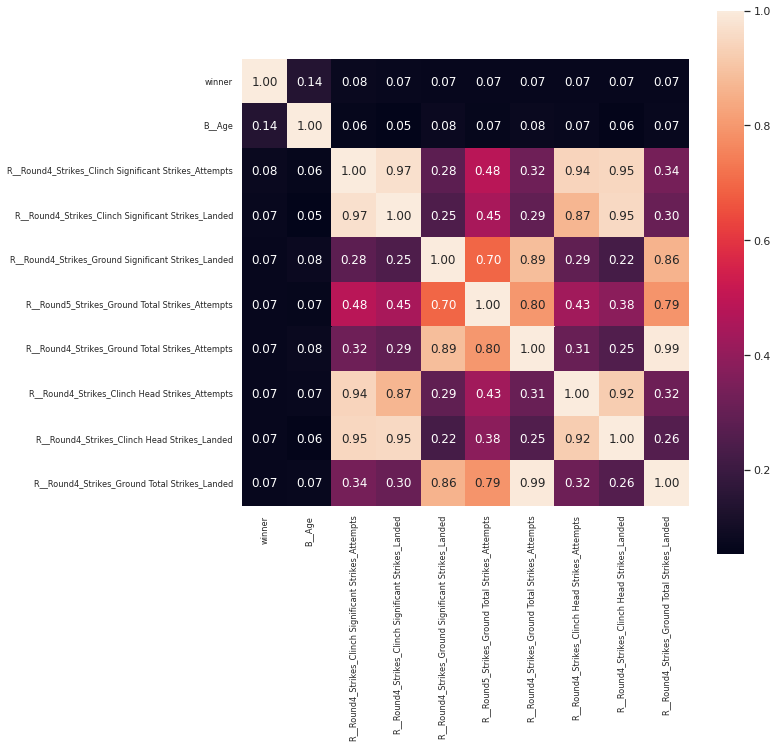

In [27]:
# Subset Correlation Matrix
k = 10 #number of variables for heatmap
fig, ax = plt.subplots(figsize=(10,10))
corrmat = dropdata.corr()
cols = corrmat.nlargest(k, 'winner')['winner'].index
cm = np.corrcoef(dropdata[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, ax=ax, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Como pode ser observado, se houverem relações entre variáveis, elas são altamente não lineares. Isso sugere que são necessárias alterações em nosso conjunto de dados.

Além disso, parece que as estatísticas do Round 4 para o Red Fighter são as mais correlacionadas, o que sugere que um tipo de conjunto de dados apartado deve produzir melhores resultados.

# Modelagem executada no kaggle

A modelagem utilizada como exemplo para o trabalho está disponível em https://www.kaggle.com/code/calmdownkarm/ufc-predictor-and-notes/notebook

Cabe ressaltar que, nesse link, foram feitos diversos tipos de modelagem mas só serão abordados, nesse trabalho, três delas. A saber:

- Random Forests
- Decision Trees Classifier
- KNN



In [51]:
 #We Store prediction of each model in our dict
# Helper Functions for our models. 

def ranfor(X_train,Y_train,X_test,Y_test,Models):
    randomfor = RandomForestClassifier(max_features="sqrt",
                                       n_estimators = 700,
                                       max_depth = None,
                                       n_jobs=-1
                                      )
    randomfor.fit(X_train,Y_train)
    Y_pred = randomfor.predict(X_test)
    Models['Random Forests'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def dec_tree(X_train,Y_train,X_test,Y_test,Models):
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, Y_train)
    Y_pred = decision_tree.predict(X_test)
    Models['Decision Tree'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
    return

def Nearest(X_train,Y_train,X_test,Y_test,Models):
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    Models['KNN'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]

def run_all_and_Plot(df):
    Models = dict()
    from sklearn.model_selection import train_test_split
    X_all = df.drop(['winner'], axis=1)
    y_all = df['winner']
    X_train, X_test, Y_train, Y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=0)
    ranfor(X_train,Y_train,X_test,Y_test,Models)
    dec_tree(X_train,Y_train,X_test,Y_test,Models)
    Nearest(X_train,Y_train,X_test,Y_test,Models)
    return Models


def plot_bar(dict):
    labels = tuple(dict.keys())
    y_pos = np.arange(len(labels))
    values = [dict[n][0] for n in dict]
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, labels,rotation='vertical')
    plt.ylabel('accuracy')
    plt.title('Accuracy of different models')
    plt.show()


def plot_cm(dict):
    count = 1
    fig = plt.figure(figsize=(10,10))
    for model in dict:
        cm = dict[model][1]
        labels = ['W','L','N','D']
        ax = fig.add_subplot(4,4,count)
        cax = ax.matshow(cm)
        plt.title(model,y=-0.8)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        # plt.subplot(2,2,count)
        count+=1
    plt.tight_layout()
    plt.show()

Random Forests 0.581081081081081
Decision Tree 0.5067567567567568
KNN 0.5709459459459459


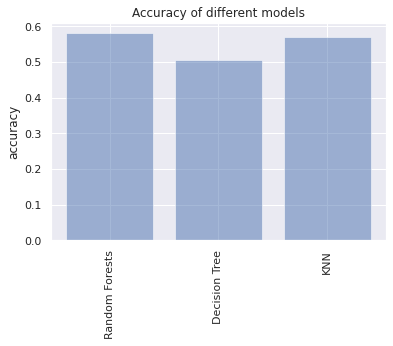

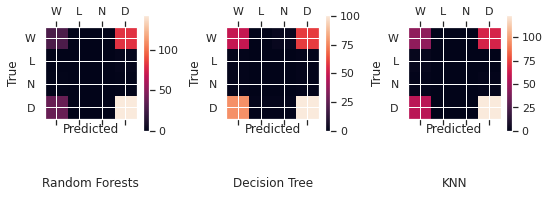

In [52]:
accuracies = run_all_and_Plot(dropdata)
CompareAll = dict()
CompareAll['Baseline'] = accuracies
for key,val in accuracies.items():
    print(str(key) +' '+ str(val[0]))
plot_bar(accuracies)
plot_cm(accuracies)

Ajustando os parãmetros dos modelos com o GridSearch

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [39]:
dontchange = ['winner','Event_ID','Fight_ID','Max_round','Last_round','B_Age','R_Age']
numeric_cols = [col for col in dropdata if col not in dontchange]
dropdata[numeric_cols] += 1 

In [40]:
newDF = dropdata.copy()
blue_cols = [col for col in dropdata.columns if 'B__' in col]
red_cols = [col for col in dropdata.columns if 'R__' in col]
for (blue,red) in zip(blue_cols,red_cols):
    newkey = ''.join(str(blue).split('_')[2:])
    dropdata[newkey] = dropdata[str(blue)]/dropdata[str(red)]
    del dropdata[str(blue)]
    del dropdata[str(red)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


Random Forests 0.5777027027027027
Decision Tree 0.5101351351351351
KNN 0.5709459459459459


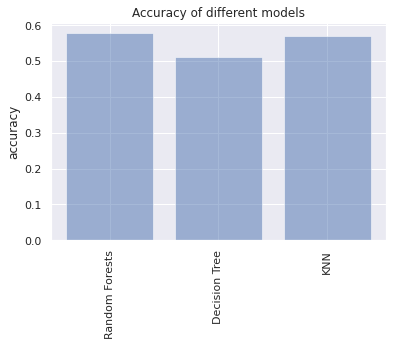

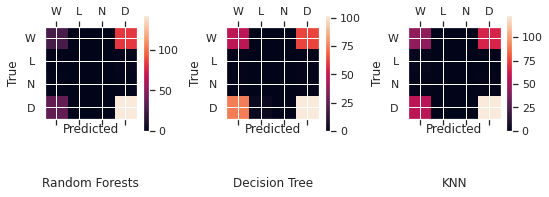

In [41]:
accuracies = run_all_and_Plot(dropdata)
for key,val in accuracies.items():
    print(str(key) +' '+ str(val[0]))
CompareAll['Blue/Red'] = accuracies
plot_bar(accuracies)
plot_cm(accuracies)

Descartando o Round 4 e o Round 5, já que a maioria das lutas são de 3 rounds.

Random Forests 0.5675675675675675
Decision Tree 0.5135135135135135
KNN 0.5540540540540541


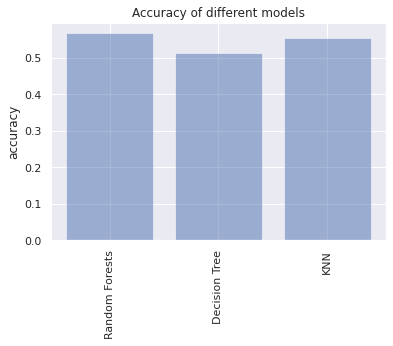

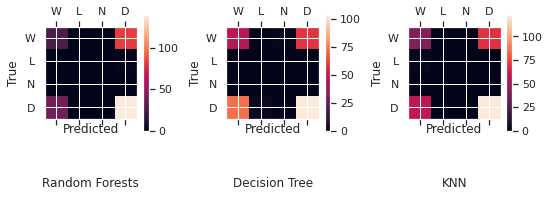

In [42]:
r4 = [col for col in dropdata.columns if "Round4" in col]
r5 = [col for col in dropdata.columns if "Round5" in col]
threerounds = dropdata.drop(r4+r5,axis = 1)
accuracies = run_all_and_Plot(threerounds)
for key,val in accuracies.items():
    print(str(key)+' '+str(val[0]))
CompareAll['DropR4&R5'] = accuracies
plot_bar(accuracies)
plot_cm(accuracies)

Eliminando lutas de 5 rounds

Random Forests 0.5777027027027027
Decision Tree 0.5472972972972973
KNN 0.5540540540540541


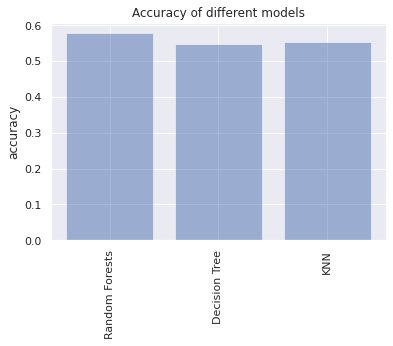

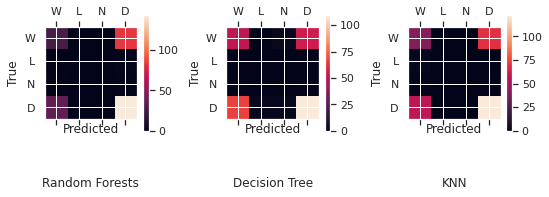

In [43]:
foobar = threerounds.loc[threerounds['Max_round'] == 3]
bewb = threerounds.drop(['Max_round','Last_round'],axis=1)
accuracies = run_all_and_Plot(bewb)
for key,val in accuracies.items():
    print(str(key)+' '+str(val[0]))
CompareAll['Drop5RoundFights'] = accuracies
plot_bar(accuracies)
plot_cm(accuracies)

Random Forests 0.5773195876288659
Decision Tree 0.5721649484536082
KNN 0.5103092783505154


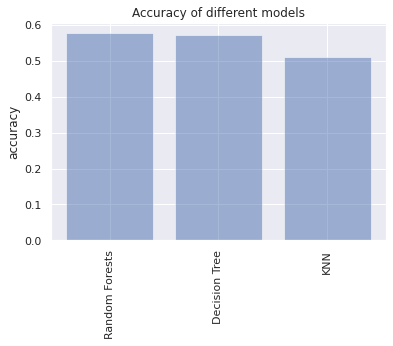

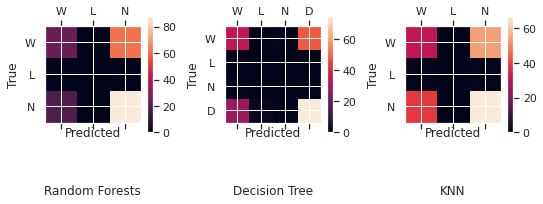

In [44]:
blahblah = bewb[bewb.Prev != 1]
accuracies = run_all_and_Plot(blahblah)
for key,val in accuracies.items():
    print(str(key)+' '+str(val[0]))
CompareAll['DroppingDebut'] = accuracies
plot_bar(accuracies)
plot_cm(accuracies)

In [45]:
blue_cols
newDF.info()
b_feats = list(set([x[10:] for x in blue_cols if "Round" in x]))
r_feats = list(set([x[10:] for x in red_cols if "Round" in x]))
def sumshit(b_feats,cols):
    for x in b_feats:
        newDF.loc[:,x] = 0
        for y in cols:
            if x in y:
                newDF[x] += newDF[y]
                newDF.drop(y,axis=1,inplace=True)
sumshit(b_feats,blue_cols)
sumshit(r_feats,red_cols)
newDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Columns: 889 entries, B__Prev to winner
dtypes: float64(873), int16(4), int64(11), int8(1)
memory usage: 10.0 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Columns: 106 entries, B__Prev to Strikes_Total Strikes_Attempts
dtypes: float64(90), int16(4), int64(11), int8(1)
memory usage: 1.2 MB


Random Forests 0.5912162162162162
Decision Tree 0.5641891891891891
KNN 0.5304054054054054


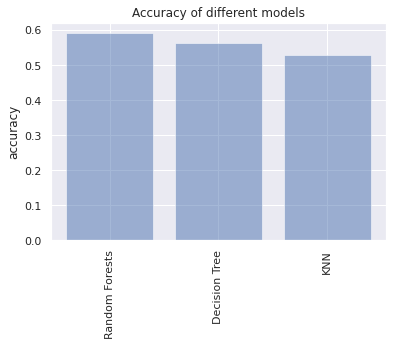

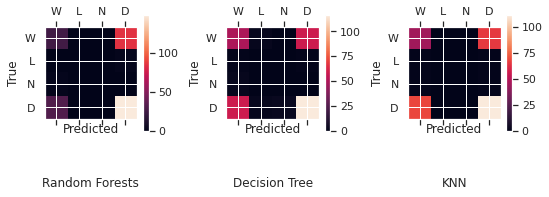

In [46]:
newDF.describe()
accuracies = run_all_and_Plot(newDF)
for key,val in accuracies.items():
    print(str(key) +' '+ str(val[0]))
CompareAll['SumRounds'] = accuracies
plot_bar(accuracies)
plot_cm(accuracies)

In [47]:
blue_cols = [col for col in newDF.columns if 'B__' in col]
red_cols = [col for col in newDF.columns if 'R__' in col]
for (blue,red) in zip(blue_cols,red_cols):
    newkey = ''.join(str(blue).split('_')[2:])
    newDF[newkey] = newDF[str(blue)]/newDF[str(red)]
    del newDF[str(blue)]
    del newDF[str(red)]

Random Forests 0.6216216216216216
Decision Tree 0.5540540540540541
KNN 0.5371621621621622


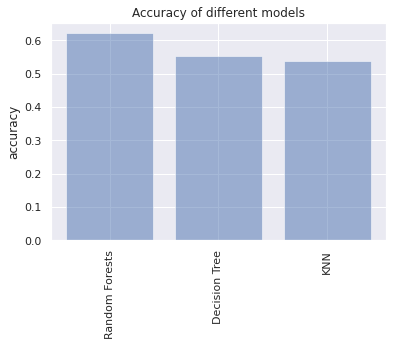

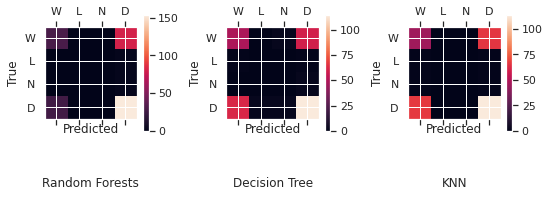

In [48]:
accuracies = run_all_and_Plot(newDF)
for key,val in accuracies.items():
    print(str(key) +' '+ str(val[0]))
CompareAll['SumRounds'] = accuracies
plot_bar(accuracies)
plot_cm(accuracies)

Random Forests 0.597972972972973
Decision Tree 0.4831081081081081
KNN 0.5202702702702703


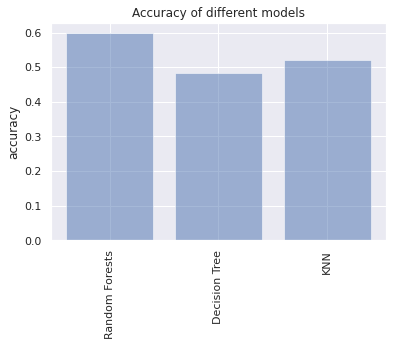

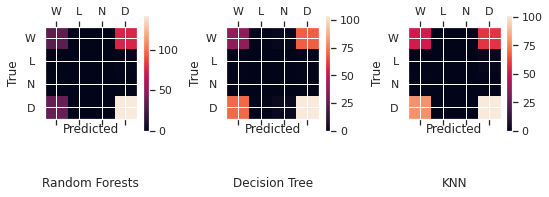

In [49]:
reduced_features = newDF.drop(["Weight","B_HomeTown","B_Location", "Event_ID", "Fight_ID", "Max_round", "Last_round", "R_HomeTown", "R_Location"],axis = 1)
accuracies = run_all_and_Plot(reduced_features)
for key,val in accuracies.items():
    print(str(key) +' '+ str(val[0]))
CompareAll['Idunno'] = accuracies
plot_bar(accuracies)
plot_cm(accuracies)

In [50]:
reduced_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 92 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   winner                                       1477 non-null   int8   
 1   Strikes_Ground Head Strikes_Landed           1477 non-null   float64
 2   Strikes_Distance Body Strikes_Landed         1477 non-null   float64
 3   Strikes_Ground Significant Kicks_Attempts    1477 non-null   float64
 4   TIP_Neutral Time                             1477 non-null   float64
 5   Strikes_Distance Strikes_Attempts            1477 non-null   float64
 6   Strikes_Ground Leg Strikes_Attempts          1477 non-null   float64
 7   Strikes_Ground Significant Strikes_Landed    1477 non-null   float64
 8   Strikes_Distance Body Strikes_Attempts       1477 non-null   float64
 9   Strikes_Clinch Head Strikes_Landed           1477 non-null   float64
 10  

O modelo com melhor valor preditivo fica entre 58-63% em média entre as execuções. Apesar de ser um modelo de acurácia muito baixa, acreditamos que este seja o melhor possível dada a quantidade de dados disponíveis e seu ruído inerente.

# Críticas e oportunidades

1) A base de dados possui muitas colunas e muitos valores com grande magnitude. Por conta disso, talvez a abordagem mais inteligente fosse trabalhar com dados padronizados. 

2) Desde o início o analista havia indicado que a melhor abordagem possivelmente era trabalhar com dados apartados pela cor do "lado" da luta. Entretando, como a luva vermelha sempre fica com o lutador com maior ranking ou campeão e a luva azul fica com o menor ranquado ou desafiante do cinturão, considero que não seja inteligente apartar as bases, uma vez que a cor não é aleatória e possui um critério coerente com os dados observados (como por exemplo maior número de vitórias do lado vermelho). 

3) Uma análise exploratória mais aprofundada poderia colaborar com a seleção de variáveis e reduzir a dimensão da base. Além disso, poderia ter sido avaliada a utilização de componentes principais para reduzir a dimensão da base ou talvez utilizar uma reamostragem bootstrapping para aumentar o volume de dados e tentar diminuir a possibilidade de overfitting. A utilização do PCA inclusive poderia contribuir para a redução de ruídos na base.

4) Poderia ter sido utilizado algum método de feature selection para o KNN.

5) Poderia ter explorado os hiperparâmetros dos modelos, mudando profundidade ou a distância, por exemplo

6) A avaliação do analista ficou muito focada apenas na acurácia. Apesar de ter mostrado graficamente um "heatmap" da matriz de confusão, a avaliação de todas as outras métricas foram ignoradas, o que é inadequado. Supondo que a análise fosse para dar suporte à um apostador, a precisão nesses casos é muito importante e foi desconsiderada.

7) Na conclusão, a acurácia foi classificada como muito baixa. Entretanto, levando em conta a quantidade de features *versus* a quantidade de observações e outros fatores como a saúde física e mental do lutador, a pressão no momento da luta ou possíveis fraturas e concussões, por exemplo, podem alterar o resultado final de forma imprevisível. 